In [1]:
##import required packages
from sklearn.manifold import TSNE
import pandas as pd
from xgboost import plot_importance
from xgboost import XGBClassifier
import seaborn as sns
from sklearn.feature_selection import RFE
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np



import warnings
warnings.simplefilter(action='ignore')


In [2]:

c4=pd.read_csv("../data/4_cluster(non_normalized data).csv").drop(["Unnamed: 0","Life Expectancy"],axis=1).dropna()


# Clusters = 4

#### Class distribution

The number of entries per class are:
1    1620
0    1133
3     278
2      69
Name: class, dtype: int64 AxesSubplot(0.125,0.125;0.775x0.755)


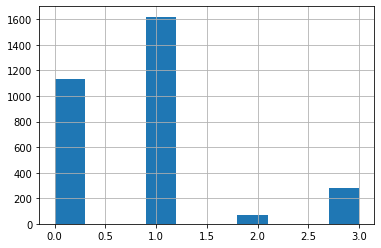

In [3]:
print("The number of entries per class are:\n{}".format(c4['class'].value_counts()),c4['class'].hist())

In [4]:
X1=c4.drop(columns=["class"],axis=1)
y1=c4['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X1, y1)
X_red=None
X_red=c4[X1.columns[(selector.get_support())]]
c4_top_features=X_red.columns.to_list()

print("Top features are\n")
for val in c4_top_features:
    print(val)

Top features are

Deaths
Years of Potential Life Lost Rate
Chlamydia Rate
% Severe Housing Problems
% Long Commute - Drives Alone
Child Mortality Rate
Drug Overdose Mortality Rate
% Uninsured
% American Indian & Alaska Native
% Female


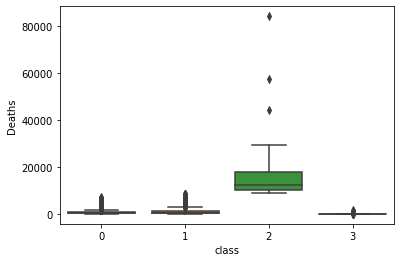

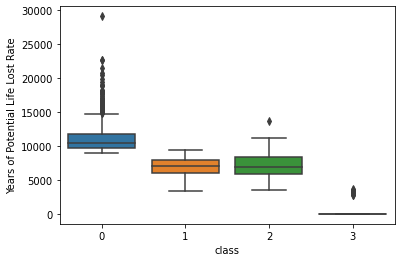

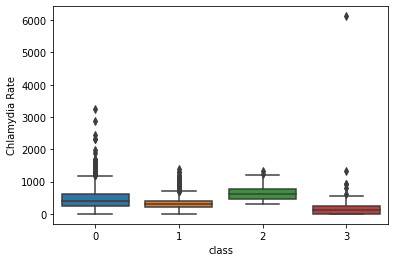

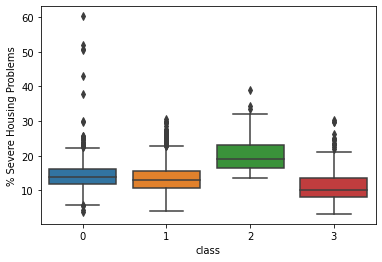

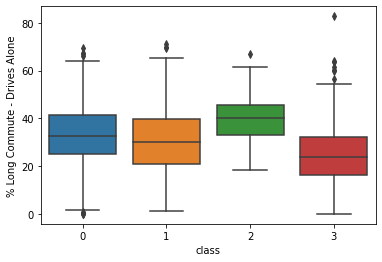

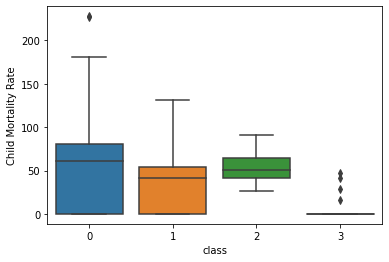

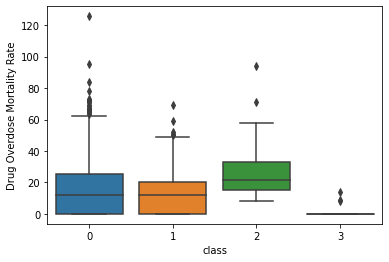

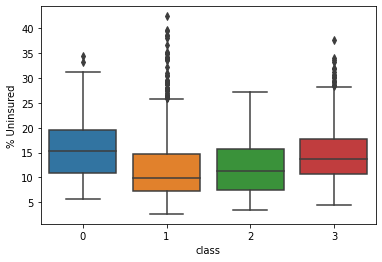

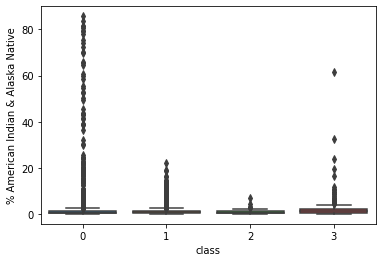

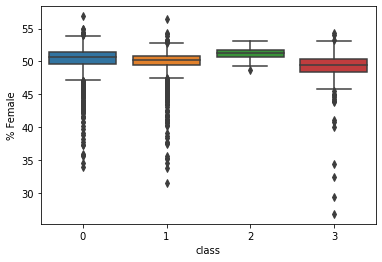

In [5]:
## Boxplots

for i in X_red.columns:
    plt.figure(frameon=True,)
    sns.boxplot(x=y1,y=X_red[i],data=X_red)

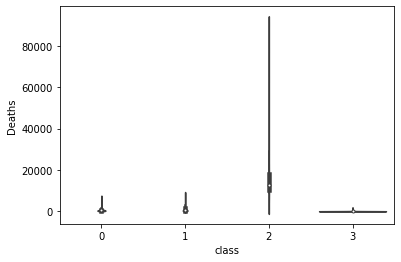

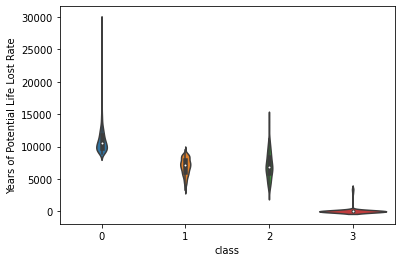

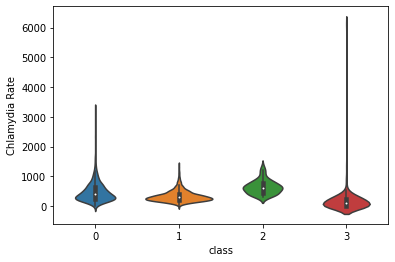

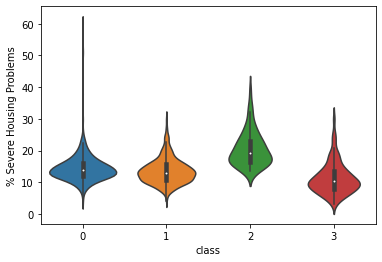

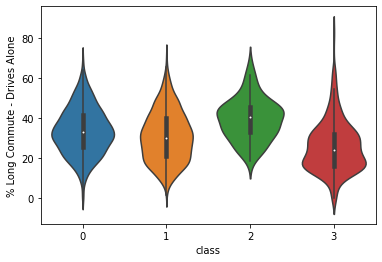

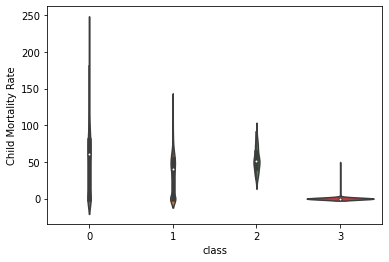

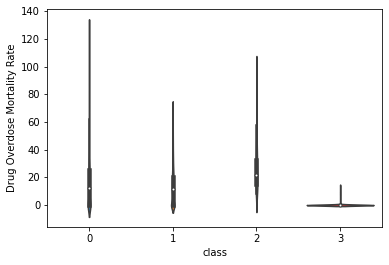

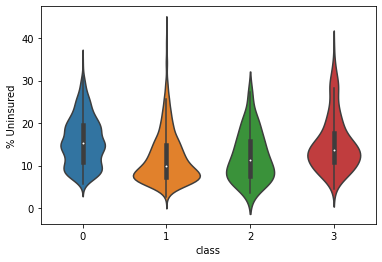

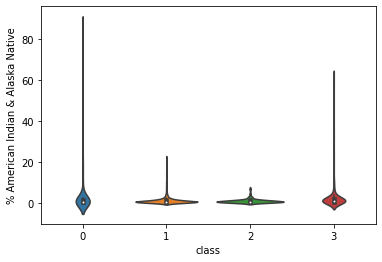

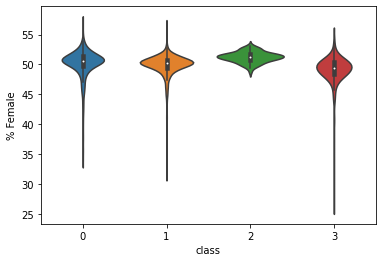

In [6]:
## Violin Plots

for i in X_red.columns:
    plt.figure(frameon=True,)
    sns.violinplot(x=y1,y=X_red[i],data=X_red)

## 1st cluster

1    1133
0    1133
Name: class, dtype: int64
Top features are

Deaths
Years of Potential Life Lost Rate
% Asian
% Uninsured
Drug Overdose Mortality Rate
High School Graduation Rate
Child Mortality Rate
Violent Crime Rate
Average Daily PM2.5
% Long Commute - Drives Alone


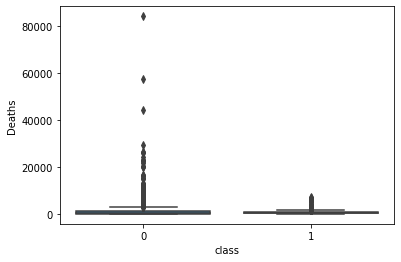

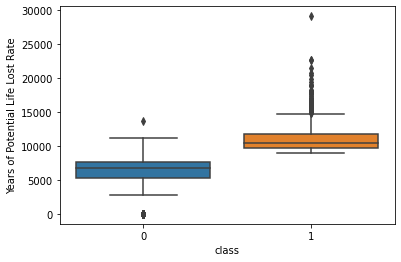

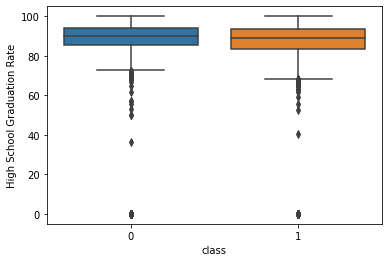

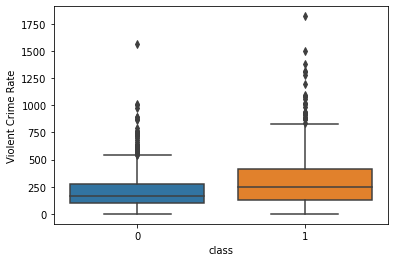

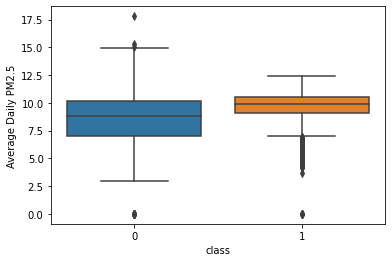

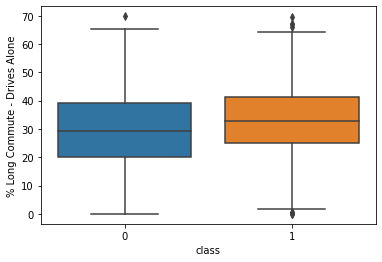

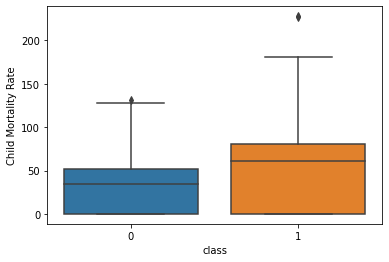

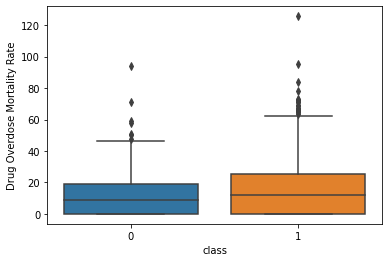

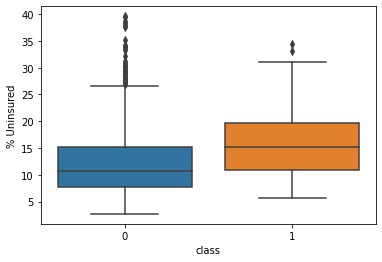

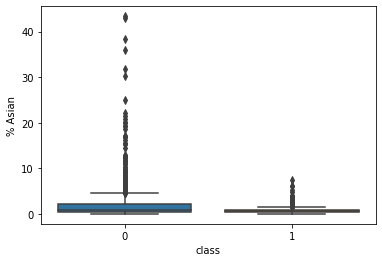

In [7]:
data1=c4[c4['class']==0]
data1_bar=c4[c4['class']!=0]
if len(data1)>1500:
    d=data1_bar
else:
    d=data1_bar.sample(n=len(data1))
data1['class']=1
d['class']=0
c41=pd.concat([data1,d],ignore_index=True)
print(c41['class'].value_counts())



X=c41.drop(['class'],axis=1)
y=c41['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X, y)
X_imp=None
X_imp=c4[X.columns[(selector.get_support())]]

c4_1_top_features=X.columns[selector.ranking_.argsort()][:10].to_list()
print("Top features are\n")
for val in c4_1_top_features:
    print(val)


for i in X_imp.columns:
    plt.figure(frameon=False)
    sns.boxplot(x=y,y=X[i],data=X)
#     sns.violinplot(x=y,y=X[i],data=X)

## 2nd cluster

1    1620
0    1480
Name: class, dtype: int64
Top features are

Deaths
% Asian
Drug Overdose Mortality Rate
Child Mortality Rate
% Long Commute - Drives Alone
Violent Crime Rate
HIV Prevalence Rate
Years of Potential Life Lost Rate
% Driving Deaths with Alcohol Involvement
Chlamydia Rate


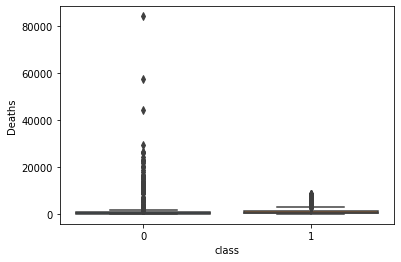

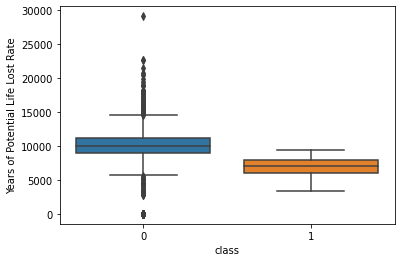

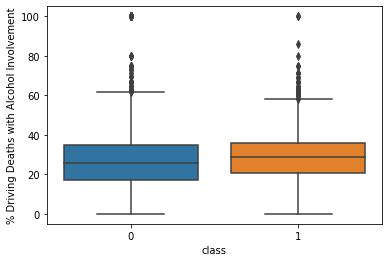

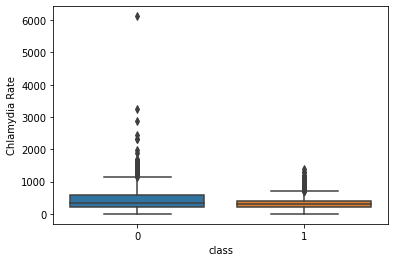

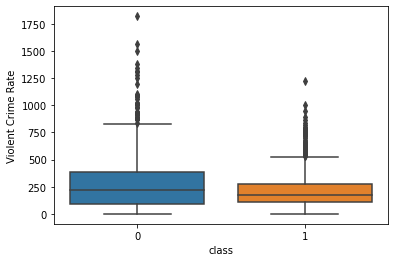

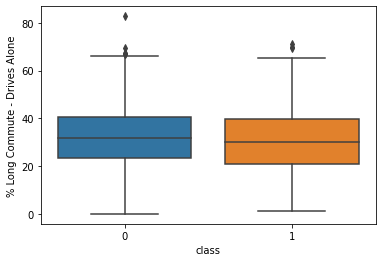

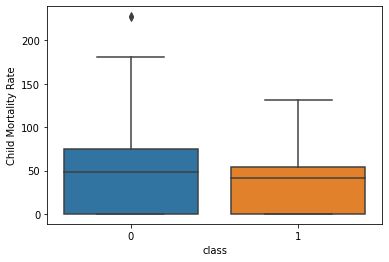

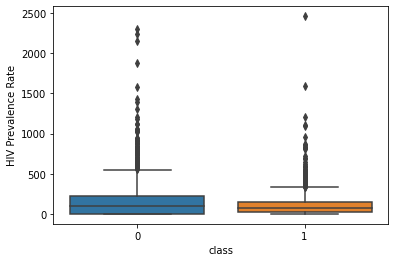

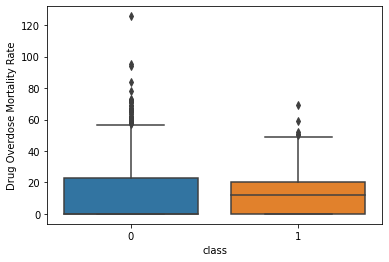

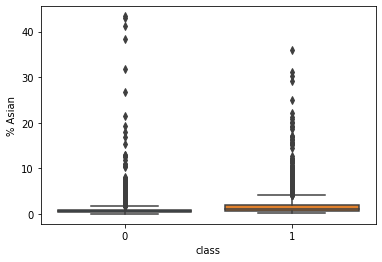

In [8]:
data1=c4[c4['class']==1]
data1_bar=c4[c4['class']!=1]
if len(data1)>1500:
    d=data1_bar
else:
    d=data1_bar.sample(n=len(data1))
data1['class']=1
d['class']=0
c42=pd.concat([data1,d],ignore_index=True)
print(c42['class'].value_counts())


X=c42.drop(['class'],axis=1)
y=c42['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X, y)
X_imp=None
X_imp=c4[X.columns[(selector.get_support())]]
c4_2_top_features=X.columns[selector.ranking_.argsort()][:10].to_list()
print("Top features are\n")
for val in c4_2_top_features:
    print(val)


for i in X_imp.columns:
    plt.figure(frameon=False)
    sns.boxplot(x=y,y=X[i],data=X)

## 3rd Cluster

1    1133
0    1133
Name: class, dtype: int64
Top features are

Deaths
Years of Potential Life Lost Rate
% Hispanic
Black/White Segregation Index
% With Annual Mammogram
High School Graduation Rate
internet_ratio
Violent Crime Rate
Average Daily PM2.5
Child Mortality Rate


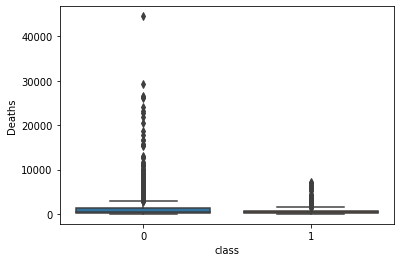

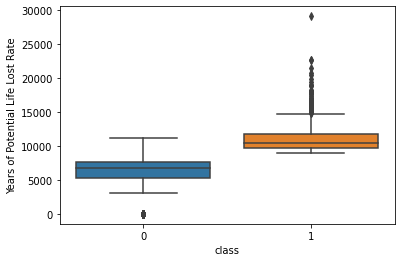

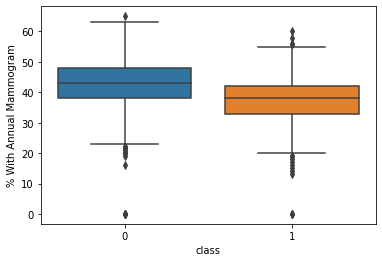

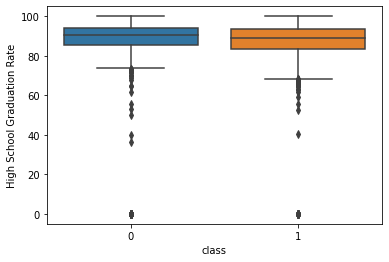

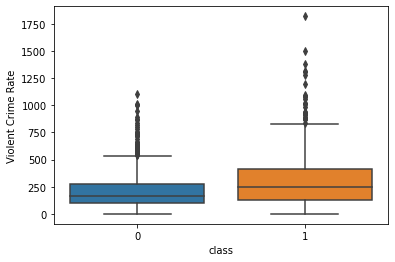

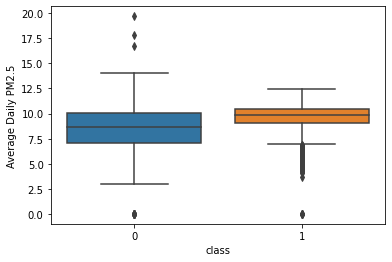

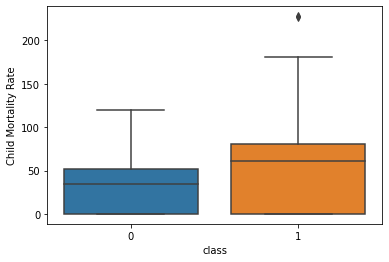

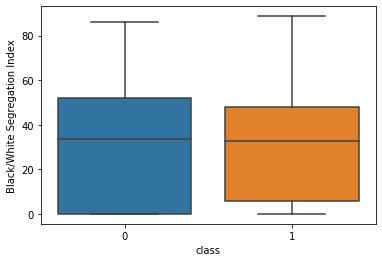

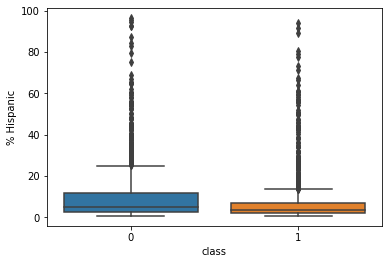

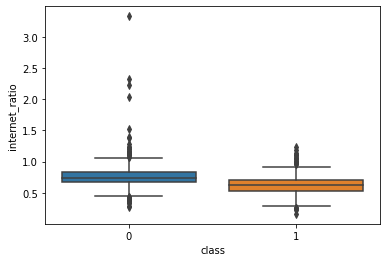

In [9]:
data1=c4[c4['class']==0]
data1_bar=c4[c4['class']!=0]
if len(data1)>1500:
    d=data1_bar
else:
    d=data1_bar.sample(n=len(data1))
data1['class']=1
d['class']=0
c43=pd.concat([data1,d],ignore_index=True)
print(c43['class'].value_counts())



X=c43.drop(['class'],axis=1)
y=c43['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X, y)
X_imp=None
X_imp=c4[X.columns[(selector.get_support())]]

c4_3_top_features=X.columns[selector.ranking_.argsort()][:10].to_list()
print("Top features are\n")
for val in c4_3_top_features:
    print(val)


for i in X_imp.columns:
    plt.figure(frameon=False)
    sns.boxplot(x=y,y=X[i],data=X)
#     sns.violinplot(x=y,y=X[i],data=X)

## 4th Cluster

1    278
0    278
Name: class, dtype: int64
Top features are

Hypertension Death Rate
% Native Hawaiian/Other Pacific Islander
% Asian
% American Indian & Alaska Native
% less than 18 years of age
internet_ratio
% Hispanic
Social Association Rate
% Female
Years of Potential Life Lost Rate


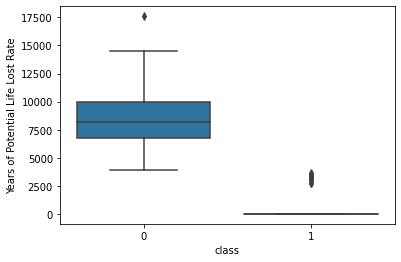

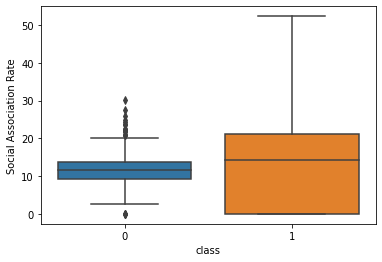

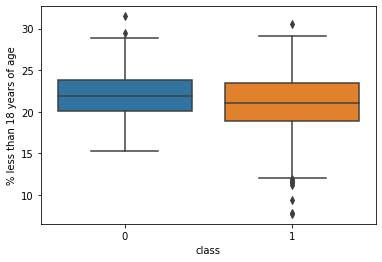

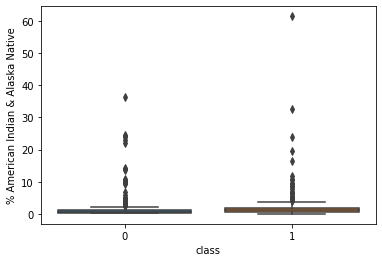

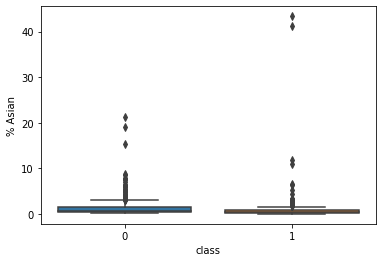

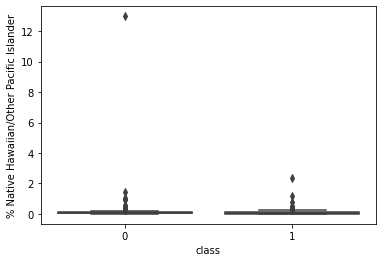

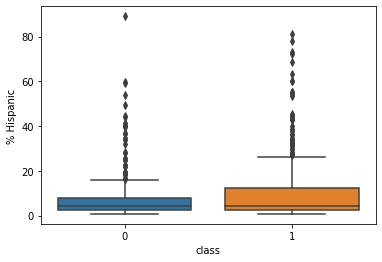

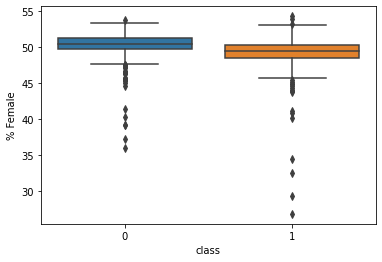

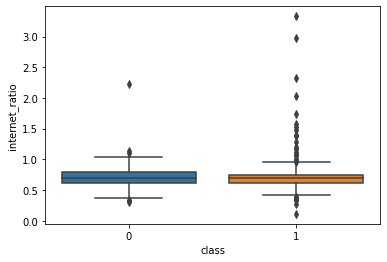

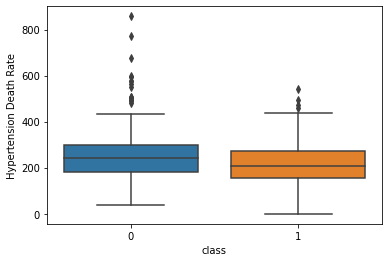

In [10]:
data1=c4[c4['class']==3]
data1_bar=c4[c4['class']!=3]
if len(data1)>1500:
    d=data1_bar
else:
    d=data1_bar.sample(n=len(data1))
data1['class']=1
d['class']=0
c44=pd.concat([data1,d],ignore_index=True)
print(c44['class'].value_counts())



X=c44.drop(['class'],axis=1)
y=c44['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X, y)
X_imp=None
X_imp=c4[X.columns[(selector.get_support())]]

c4_4_top_features=X.columns[selector.ranking_.argsort()][:10].to_list()
print("Top features are\n")
for val in c4_4_top_features:
    print(val)


for i in X_imp.columns:
    plt.figure(frameon=False)
    sns.boxplot(x=y,y=X[i],data=X)
#     sns.violinplot(x=y,y=X[i],data=X)

### Combining all top features in a dataframe

In [11]:
Feature_data=pd.DataFrame(columns=['all','c41','c42','c43','c44'])

In [12]:
# Top 10 features making contributing towards n=4 clusters case
Feature_data['all']=(c4_top_features) 

# Top 10 features making contributing towards 1st cluster 
Feature_data['c41']=c4_1_top_features 

# Top 10 features making contributing towards 2nd cluster 
Feature_data['c42']=c4_2_top_features 

# Top 10 features making contributing towards 3rd cluster
Feature_data['c43']=c4_3_top_features 


# Top 10 features making contributing towards 4th cluster 
Feature_data['c44']=c4_4_top_features 


In [13]:
Feature_data

,all,c41,c42,c43,c44
0,Deaths,Deaths,Deaths,Deaths,Hypertension Death Rate
1,Years of Potential Life Lost Rate,Years of Potential Life Lost Rate,% Asian,Years of Potential Life Lost Rate,% Native Hawaiian/Other Pacific Islander
2,Chlamydia Rate,% Asian,Drug Overdose Mortality Rate,% Hispanic,% Asian
3,% Severe Housing Problems,% Uninsured,Child Mortality Rate,Black/White Segregation Index,% American Indian & Alaska Native
4,% Long Commute - Drives Alone,Drug Overdose Mortality Rate,% Long Commute - Drives Alone,% With Annual Mammogram,% less than 18 years of age
5,Child Mortality Rate,High School Graduation Rate,Violent Crime Rate,High School Graduation Rate,internet_ratio
6,Drug Overdose Mortality Rate,Child Mortality Rate,HIV Prevalence Rate,internet_ratio,% Hispanic
7,% Uninsured,Violent Crime Rate,Years of Potential Life Lost Rate,Violent Crime Rate,Social Association Rate
8,% American Indian & Alaska Native,Average Daily PM2.5,% Driving Deaths with Alcohol Involvement,Average Daily PM2.5,% Female
9,% Female,% Long Commute - Drives Alone,Chlamydia Rate,Child Mortality Rate,Years of Potential Life Lost Rate


### Sorting the values in the dataframe

In [14]:
df = Feature_data.apply(lambda x: x.sort_values().values)

In [15]:
df

,all,c41,c42,c43,c44
0,% American Indian & Alaska Native,% Asian,% Asian,% Hispanic,% American Indian & Alaska Native
1,% Female,% Long Commute - Drives Alone,% Driving Deaths with Alcohol Involvement,% With Annual Mammogram,% Asian
2,% Long Commute - Drives Alone,% Uninsured,% Long Commute - Drives Alone,Average Daily PM2.5,% Female
3,% Severe Housing Problems,Average Daily PM2.5,Child Mortality Rate,Black/White Segregation Index,% Hispanic
4,% Uninsured,Child Mortality Rate,Chlamydia Rate,Child Mortality Rate,% Native Hawaiian/Other Pacific Islander
5,Child Mortality Rate,Deaths,Deaths,Deaths,% less than 18 years of age
6,Chlamydia Rate,Drug Overdose Mortality Rate,Drug Overdose Mortality Rate,High School Graduation Rate,Hypertension Death Rate
7,Deaths,High School Graduation Rate,HIV Prevalence Rate,Violent Crime Rate,Social Association Rate
8,Drug Overdose Mortality Rate,Violent Crime Rate,Violent Crime Rate,Years of Potential Life Lost Rate,Years of Potential Life Lost Rate
9,Years of Potential Life Lost Rate,Years of Potential Life Lost Rate,Years of Potential Life Lost Rate,internet_ratio,internet_ratio


### It can be observed that the features contribution to generating 4 clusters and the ones mostly making up the individual clusters are different.

In [16]:
columns=df['all'].tolist()
# columns.append('class')


### Data distribution for most important features for n_cluster=4

In [25]:
from sklearn.preprocessing import quantile_transform as qt
new_df=c4[columns]
X_all=c4.drop('class',axis=1)
X_norm1=qt(new_df, n_quantiles=5, random_state=13, copy=False)
X_norm2=qt(X_all, n_quantiles=5, random_state=13, copy=False)
new_df[columns] = X_norm1

X_all=X_norm2

In [26]:
new_df['class']=c4['class']

## Facetgrids with clusterwise data distribution for top 10 features

In [27]:
# new_df=c4[columns]


In [28]:
new_df

,% American Indian & Alaska Native,% Female,% Long Commute - Drives Alone,% Severe Housing Problems,% Uninsured,Child Mortality Rate,Chlamydia Rate,Deaths,Drug Overdose Mortality Rate,Years of Potential Life Lost Rate,class
0,0.345187,0.767971,0.735772,0.630618,0.417452,0.672800,0.630602,0.668282,0.515989,0.516222,1
1,0.550281,0.771808,0.759248,0.524240,0.596281,0.565096,0.511385,0.755972,0.580671,0.405160,1
2,0.508120,0.225580,0.535230,0.622850,0.684300,0.768369,0.760069,0.527753,0.000000,0.754246,0
3,0.303107,0.220760,0.806812,0.233023,0.527959,0.785823,0.532705,0.527313,0.766996,0.776680,0
4,0.506031,0.644353,0.863183,0.234674,0.734787,0.782806,0.295679,0.750326,0.757776,0.768320,0
...,...,...,...,...,...,...,...,...,...,...,...
3095,0.750698,0.240278,0.205682,0.212572,0.727580,0.452943,0.278395,0.554185,0.707907,0.474898,1
3096,0.603055,0.238714,0.163636,0.756046,0.751350,0.000000,0.545033,0.153090,0.000000,0.108507,3
3097,0.750325,0.248996,0.217045,0.295154,0.710273,0.496006,0.175197,0.334416,0.000000,0.401738,1
3098,0.751495,0.249998,0.078409,0.217582,0.769515,0.000000,0.268025,0.154494,0.000000,0.293031,1


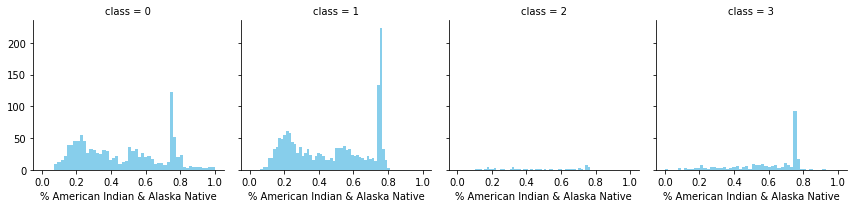

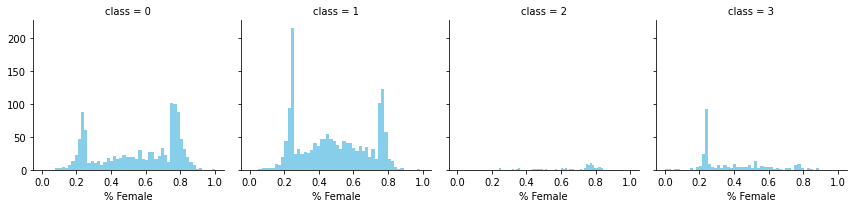

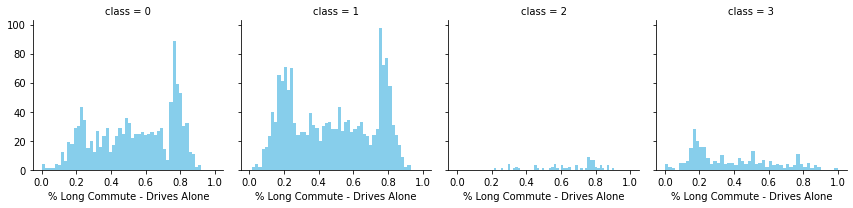

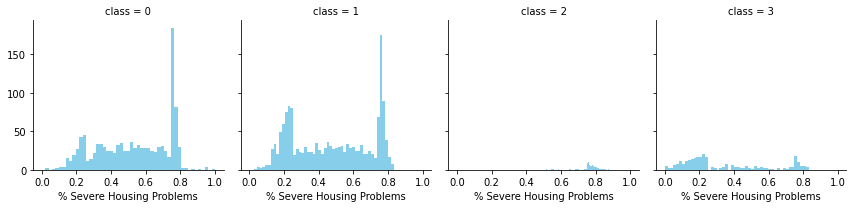

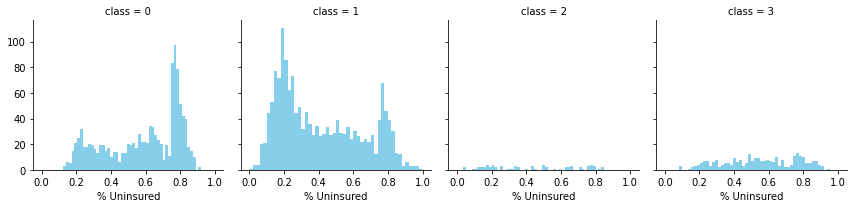

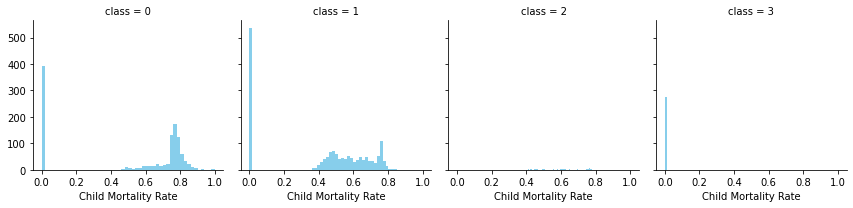

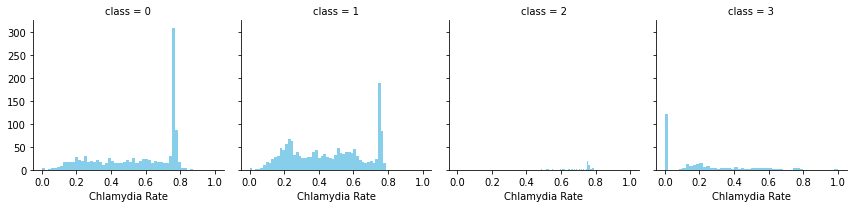

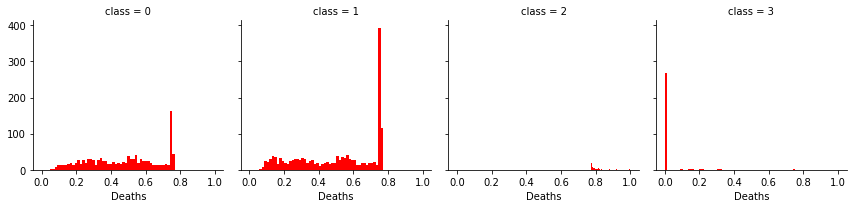

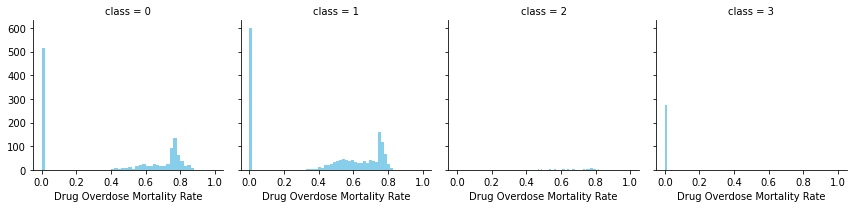

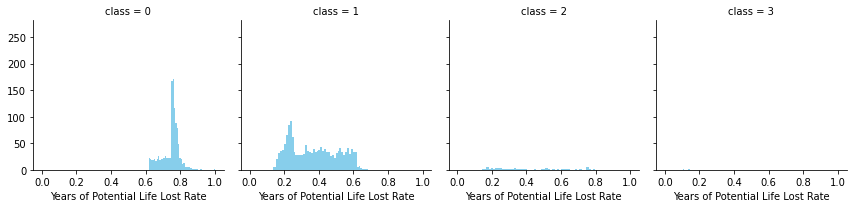

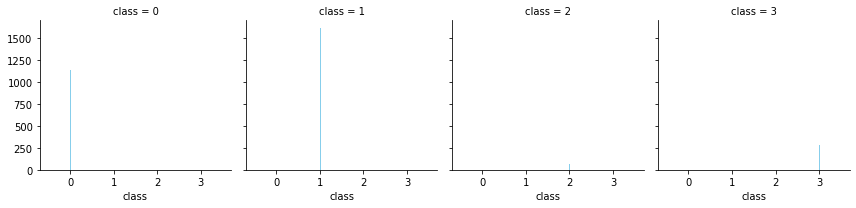

In [29]:
#https://www.kaggle.com/sabanasimbutt/clustering-visualization-of-clusters-using-pca
colors=['blue','blue','blue','blue','blue','blue','red','blue','blue','blue']

for features in new_df:
    grid= sns.FacetGrid(new_df, col='class')
    color='red' if features=="Deaths" else 'skyblue'
    grid.map(plt.hist, features,bins=50,color=color)
    

In [30]:
new_df['class']=c4['class']

In [31]:
columns

['% American Indian & Alaska Native',
 '% Female',
 '% Long Commute - Drives Alone',
 '% Severe Housing Problems',
 '% Uninsured',
 'Child Mortality Rate',
 'Chlamydia Rate',
 'Deaths',
 'Drug Overdose Mortality Rate',
 'Years of Potential Life Lost Rate']

In [32]:
X_new=c4[columns]

In [33]:
# X_filtered=X_new
# X_fileterd['class']=c4['class']

In [34]:
# X_filtered_norm = X_filtered.copy()
# d = {}
# for col in X_filtered_norm:
#     d.update({col : sorted(X_filtered_norm[col])})
# sorted_X_filtered_norm = pd.DataFrame(d)
# rank = sorted_X_filtered_norm.mean(axis = 1).tolist()
# for col in X_filtered_norm:
#     t = np.searchsorted(np.sort(X_filtered_norm[col]), X_filtered_norm[col])
#     X_filtered_norm[col] = [rank[i] for i in t]


In [35]:
# X_filtered_norm.boxplot(grid=True, rot=45,figsize=(20,14))

In [36]:
# from sklearn import preprocessing
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(X_new)
# df_normalized = pd.DataFrame(x_scaled,columns=columns)

In [37]:
new_df['class']=c4['class']

## Boxplots for all the top 10 important features grouped by respective cluster labels

<AxesSubplot:xlabel='class', ylabel='value'>

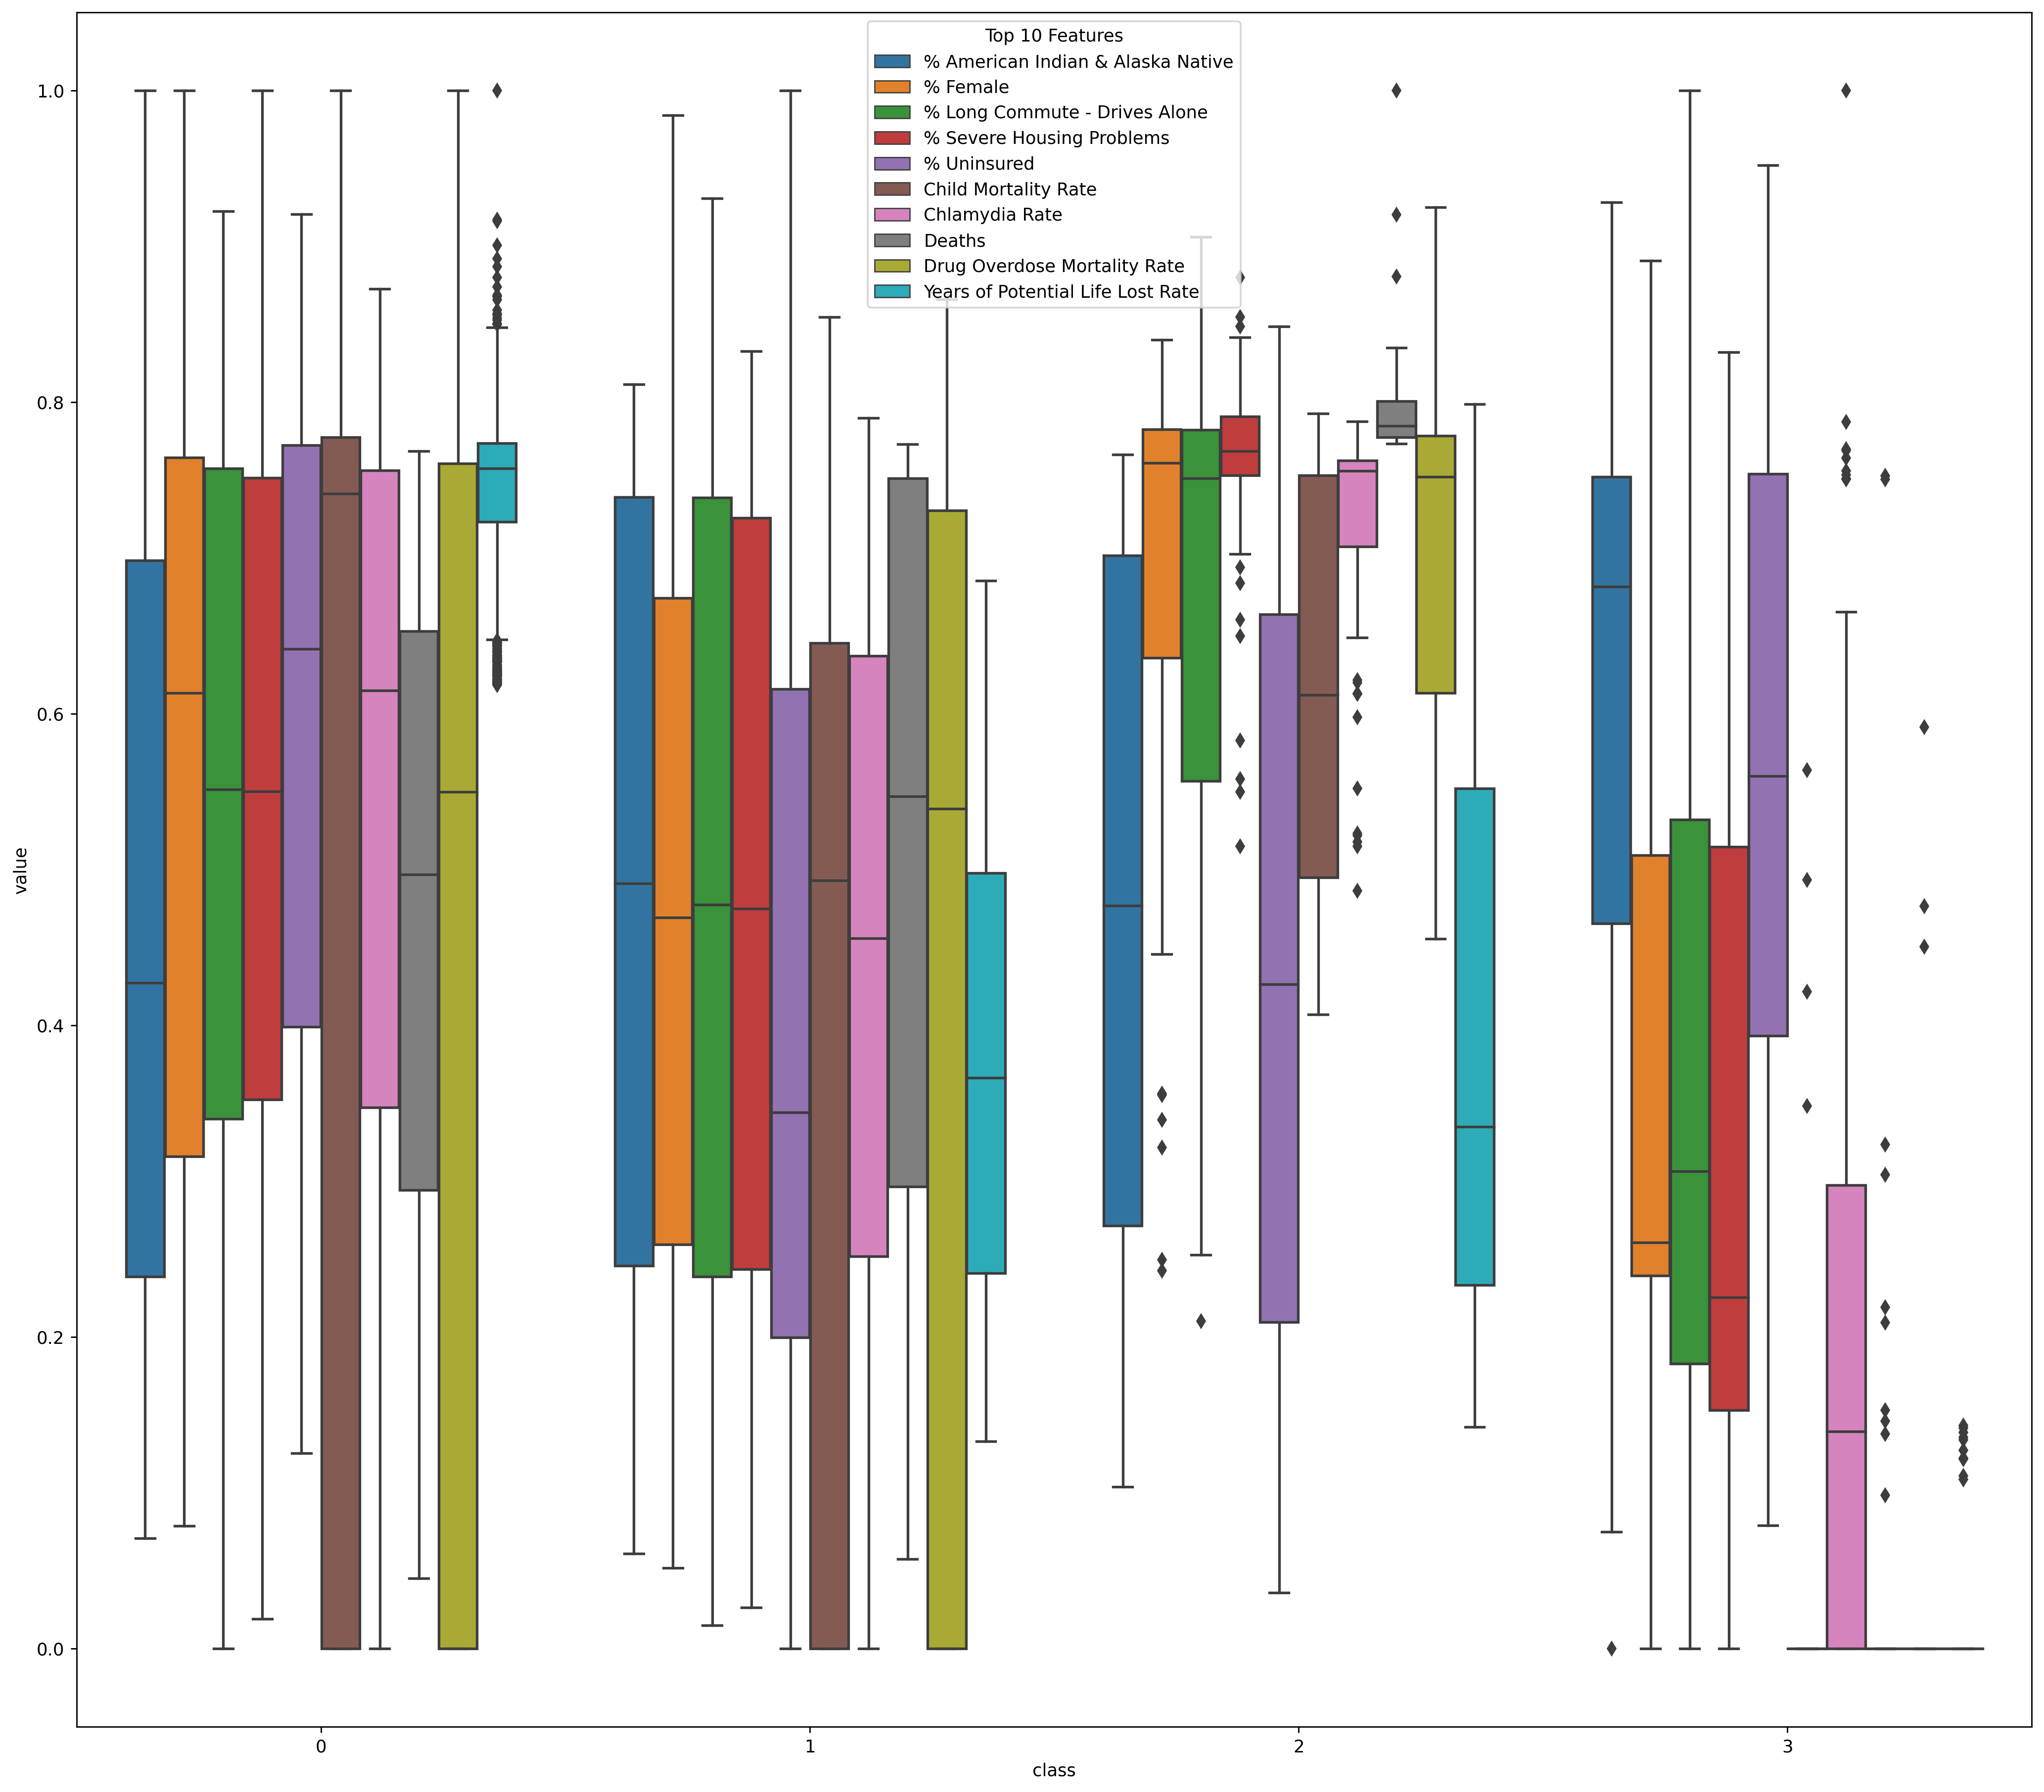

In [38]:
import seaborn as sns
plt.figure(frameon=False,figsize=(20,18),dpi=255)
dd=pd.melt(new_df,id_vars=['class'],value_vars=columns,var_name='Top 10 Features',)
sns.boxplot(x='class',y='value',data=dd,hue='Top 10 Features',)
# plt.savefig('feature_boxplot_for_ncluster=4.png')

In [39]:
X_new=new_df.drop('class',axis=1)
labels=c4['class']

In [40]:
dist = 1 - cosine_similarity(X_norm2)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(3100, 2)

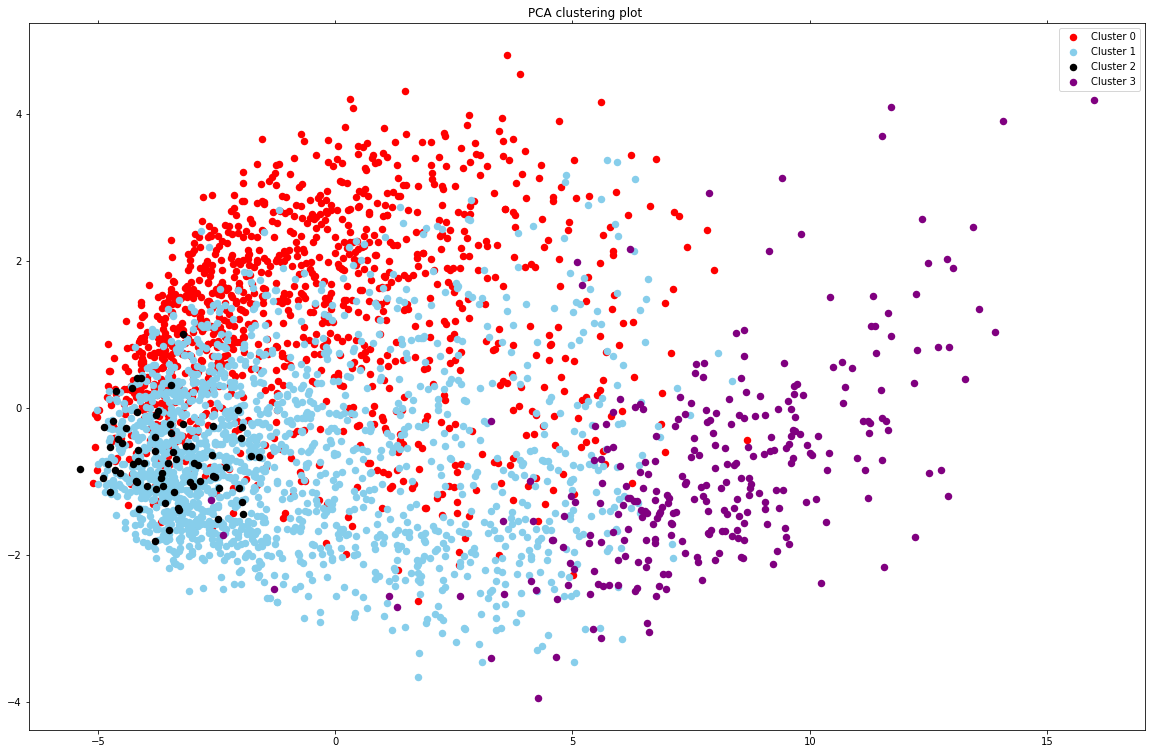

In [41]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'skyblue',
          2: 'black', 
          3: 'purple', 
         }

names = {0: 'Cluster 0', 
         1: 'Cluster 1', 
         2: 'Cluster 2', 
         3: 'Cluster 3', 
         }
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='.', linestyle='', ms=15,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
plt.title("PCA clustering plot ")
plt.show()